In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/My Drive/Dataset'

/content/drive/My Drive/Dataset


In [ ]:
import os
import sys
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from gensim.models import KeyedVectors

In [ ]:
reviews_df = pd.read_csv('Hotel_Review.csv')
print(reviews_df.dtypes)

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object


In [ ]:
def clean(text):
    '''
    '''
    text = text.lower()
    text = text.replace("ain't", "am not")
    text = text.replace("aren't", "are not")
    text = text.replace("can't", "cannot")
    text = text.replace("can't've", "cannot have")
    text = text.replace("'cause", "because")
    text = text.replace("could've", "could have")
    text = text.replace("couldn't", "could not")
    text = text.replace("couldn't've", "could not have")
    text = text.replace("should've", "should have")
    text = text.replace("should't", "should not")
    text = text.replace("should't've", "should not have")
    text = text.replace("would've", "would have")
    text = text.replace("would't", "would not")
    text = text.replace("would't've", "would not have")
    text = text.replace("didn't", "did not")
    text = text.replace("doesn't", "does not")
    text = text.replace("don't", "do not")
    text = text.replace("hadn't", "had not")
    text = text.replace("hadn't've", "had not have")
    text = text.replace("hasn't", "has not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd", "he would")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd've", "he would have")
    text = text.replace("'s", "")
    text = text.replace("'t", "")
    text = text.replace("'ve", "")
    text = text.replace(".", " . ")
    text = text.replace("!", " ! ")
    text = text.replace("?", " ? ")
    text = text.replace(";", " ; ")
    text = text.replace(":", " : ")
    text = text.replace(",", " , ")
    text = text.replace("´", "")
    text = text.replace("‘", "")
    text = text.replace("’", "")
    text = text.replace("“", "")
    text = text.replace("”", "")
    text = text.replace("\'", "")
    text = text.replace("\"", "")
    text = text.replace("-", "")
    text = text.replace("–", "")
    text = text.replace("—", "")
    text = text.replace("[", "")
    text = text.replace("]","")
    text = text.replace("{","")
    text = text.replace("}", "")
    text = text.replace("/", "")
    text = text.replace("|", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace("$", "")
    text = text.replace("+", "")
    text = text.replace("*", "")
    text = text.replace("%", "")
    text = text.replace("#", "")
    text = text.replace("\n", " \n ")
    text = text.replace("\n", "")
    text = text.replace("_", " _ ")
    text = text.replace("_", "")
    text = ''.join([i for i in text if not i.isdigit()])

    return text

In [ ]:
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values

In [ ]:
cleaned_positive_reviews = [clean(r) for r in positive_reviews]
cleaned_negative_reviews = [clean(r) for r in negative_reviews]

In [ ]:
reviews_df['Positive_Review'] = cleaned_positive_reviews
reviews_df['Negative_Review'] = cleaned_negative_reviews

In [ ]:
# Shuffling data
reviews_df = reviews_df.sample(frac=1).reset_index(drop=True)

# Extracting all text
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values
reviews_text = []

for p,n in zip(positive_reviews, negative_reviews) :
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        reviews_text.append(n)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        reviews_text.append(p)
    else :
        reviews_text.append(n)
        reviews_text.append(p)

In [ ]:
training_df = reviews_df.loc[:10000]
positive_reviews_filtered = training_df['Positive_Review'].values
negative_reviews_filtered = training_df['Negative_Review'].values
training_reviews = []
labels = []

for idx,(p,n) in enumerate(zip(positive_reviews_filtered, negative_reviews_filtered)) :
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(n)
        labels.append(0)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(p)
        labels.append(1)
    else :
        training_reviews.append(n)
        labels.append(0)
        training_reviews.append(p)
        labels.append(1)

In [ ]:
dict1 ={
    'reviews' : training_reviews,
    'labels' : labels
}
sentiment_df = pd.DataFrame.from_dict(dict1)

In [ ]:
dict2 ={
    'reviews_text' : reviews_text
}
reviews_text_df = pd.DataFrame.from_dict(dict2)

In [ ]:
training_reviews[:10]

[' the shower door leaked onto the bathroom floor badly the room lights were a bit awkward to figure out there are  pre programmed settings with no on off for any one fixture the scrambled eggs for breakfast were terrible use real eggs instead of the powdered ones please there s no nice sit down restaurant at this hotel but there is a lobby area with tables and chairs where food can be purchased as you enjoy your beverages from the bar ',
 ' situated just   minutes from the airport this hotel has stunning views of barcelona from the upper rooms from our room we had a panoramic view of the barcelona fc stadium national museum of art the olympic stadium the airport and all the way to the mediteranean sea we even were treated to a nightly fireworks show all rooms are accessible via internal hallways that open to the lobby below our room on the th floor was modern and nicely appointed the entire facility was new and very well maintained the staff could not have been more accommodating or n

In [ ]:
tokenizer = Tokenizer(num_words=200)
tokenizer.fit_on_texts(training_reviews)
sequences = tokenizer.texts_to_sequences(training_reviews)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

MAX_SEQUENCE_LENGTH = 1000

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 10835 unique tokens.
Shape of data tensor: (16796, 1000)
Shape of label tensor: (16796, 2)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(data, labels, test_size=0.5, random_state=42)

In [ ]:
!wget  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
!unzip wiki-news-300d-1M.vec.zip

--2024-02-28 07:12:26--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.173.166.51, 18.173.166.48, 18.173.166.31, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.173.166.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip.19’

wiki-news-300d-1M.v 100%[===================>] 650.22M  57.6MB/s    in 13s     

2024-02-28 07:12:39 (51.9 MB/s) - ‘wiki-news-300d-1M.vec.zip.19’ saved [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip
replace wiki-news-300d-1M.vec? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: wiki-news-300d-1M.vec   

In [ ]:
model_ft = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec', binary=False,limit=300)

In [ ]:
import keras

In [ ]:
vocabSize = len(word_index) + 1
# Querying SQLlite database to extract needed words embeddings
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(training_reviews)
vocabSize = len(tokenizer.word_index) + 1
vocabSize

10836

In [ ]:
EMBEDDING_DIM = 300
MAX_NUM_WORDS = 500
print('Preparing embedding matrix.fast text')

# Prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
print(num_words)
embedding_matrix = np.zeros((vocabSize, EMBEDDING_DIM))

for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    if word in model_ft.key_to_index:  # Check if the word is in the vocabulary
        embedding_vector = model_ft[word]
        embedding_vector = np.array(embedding_vector)
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix.shape)


Preparing embedding matrix.fast text
500
(10836, 300)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Flatten
from keras.initializers import Constant

print('Training model.')

# define the model
model = Sequential()
model.add(Embedding(vocabSize,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

# summarize the model
print(model.summary())

model.fit(x_train, y_train,
          batch_size=256,
          epochs=5,
          validation_data=(x_val, y_val))

Training model.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 300)         3250800   
                                                                 
 flatten (Flatten)           (None, 300000)            0         
                                                                 
 dense (Dense)               (None, 512)               153600512 
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 157015794 (598.97 MB)
Trai

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print('Accuracy: %f' % (accuracy))
print('Loss: %f' % (loss))

Accuracy: 0.841867
Loss: 0.354766


In [ ]:
#model.most_similar(positive="dinner")
#from keras.preprocessing.text import Tokenizer
model.save_weights("model.h5")

In [ ]:
from keras.preprocessing.text import text_to_word_sequence
import keras

In [ ]:
reviews = [ str(r) for r in sentiment_df['reviews'].values]
labels = sentiment_df['labels'].values

for idx, review in enumerate(training_reviews):
    words = text_to_word_sequence(review)
    if(len(words) > 40):
        words = words[:40]
        training_reviews[idx] = ' '.join(words)

oneHotReviews = tokenizer.texts_to_sequences(reviews)
encodedReviews = keras.preprocessing.sequence.pad_sequences(oneHotReviews, maxlen=1000, padding='post')

X_train, X_test, y_train, y_test = train_test_split(encodedReviews, labels, test_size=0.33, random_state=42)

In [ ]:
import keras

# Assuming you have defined vocabSize, embedding_matrix, X_train, and y_train

model1 = keras.models.Sequential()
model1.add(keras.layers.Embedding(vocabSize, 300, weights=[embedding_matrix], input_length=1000, trainable=True))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model1.fit(X_train, y_train, epochs=5, verbose=1)

# Print accuracy and loss
loss, accuracy = model1.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))


Epoch 1/5
352/352 [==============================] - 38s 106ms/step - loss: 0.3063 - acc: 0.8724
Epoch 2/5
352/352 [==============================] - 36s 102ms/step - loss: 0.1483 - acc: 0.9509
Epoch 3/5
352/352 [==============================] - 33s 93ms/step - loss: 0.1049 - acc: 0.9663
Epoch 4/5
352/352 [==============================] - 33s 95ms/step - loss: 0.0785 - acc: 0.9759
Epoch 5/5
352/352 [==============================] - 33s 93ms/step - loss: 0.0597 - acc: 0.9810
Training Accuracy: 0.9865
Training Loss: 0.0471


Epoch 1/5
352/352 [==============================] - 35s 100ms/step - loss: 0.0500 - acc: 0.9837
Epoch 2/5
352/352 [==============================] - 35s 100ms/step - loss: 0.0437 - acc: 0.9853
Epoch 3/5
352/352 [==============================] - 34s 96ms/step - loss: 0.0390 - acc: 0.9865
Epoch 4/5
352/352 [==============================] - 32s 91ms/step - loss: 0.0372 - acc: 0.9872
Epoch 5/5
352/352 [==============================] - 33s 93ms/step - loss: 0.0394 - acc: 0.9870


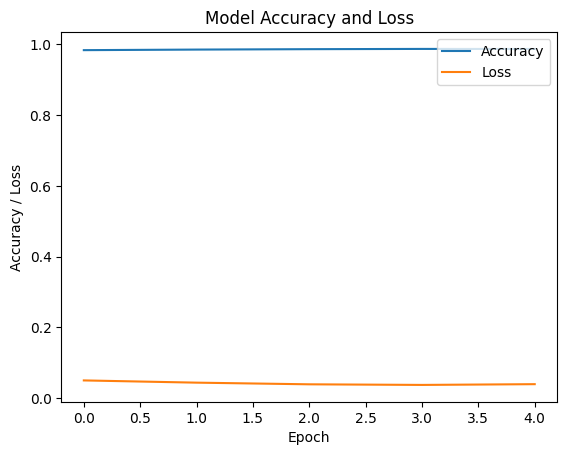

In [ ]:
import matplotlib.pyplot as plt

history = model1.fit(X_train, y_train, epochs=5, verbose=1)
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend(['Accuracy', 'Loss'], loc='upper right')
plt.show()


In [ ]:
embedding_weights = model1.layers[0].get_weights()[0]
# Visualize embedding_weights


In [ ]:
from sklearn.metrics import matthews_corrcoef, roc_curve, auc, precision_recall_curve

# Predict probabilities
y_pred_prob = model1.predict(X_test)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred_prob.round())

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)


174/174 [==============================] - 4s 22ms/step


174/174 [==============================] - 4s 21ms/step


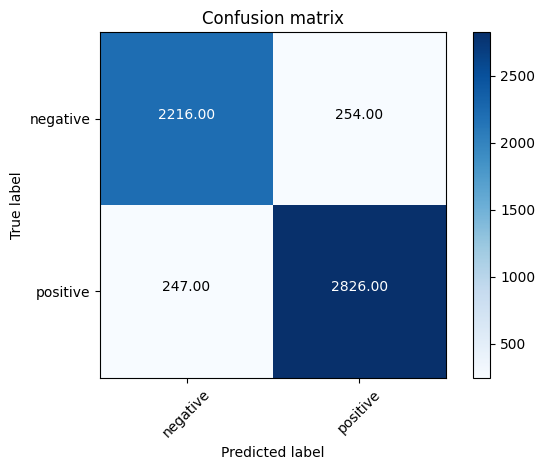

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import gensim
from sklearn.model_selection import train_test_split
from numpy import zeros
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from gensim.models import Word2Vec

# Assuming you've already defined and compiled your model as 'model1'
predictions = model1.predict(X_test)
predicted_classes = [1 if prediction > 0.5 else 0 for prediction in predictions]

cm = confusion_matrix(y_test, predicted_classes, labels=[0, 1])
title = 'Confusion matrix'
cmap = plt.cm.Blues
classes = ["negative", "positive"]
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [ ]:
predicted_classes = [1 if prediction > 0.5 else 0 for prediction in predictions]
report = classification_report(y_test, predicted_classes, target_names=['0', '1'])
print(report)


              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2470
           1       0.92      0.92      0.92      3073

    accuracy                           0.91      5543
   macro avg       0.91      0.91      0.91      5543
weighted avg       0.91      0.91      0.91      5543



In [ ]:
from sklearn.metrics import matthews_corrcoef

# Assuming y_test and y_pred_prob are already defined
mcc = matthews_corrcoef(y_test, y_pred_prob.round())
print("Matthews Correlation Coefficient:", mcc)


Matthews Correlation Coefficient: 0.8170183536083331


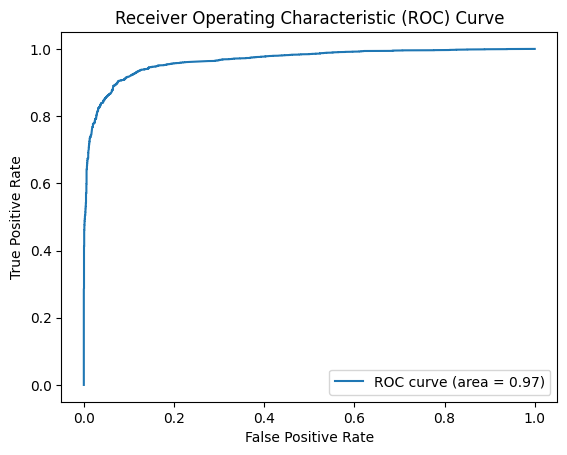

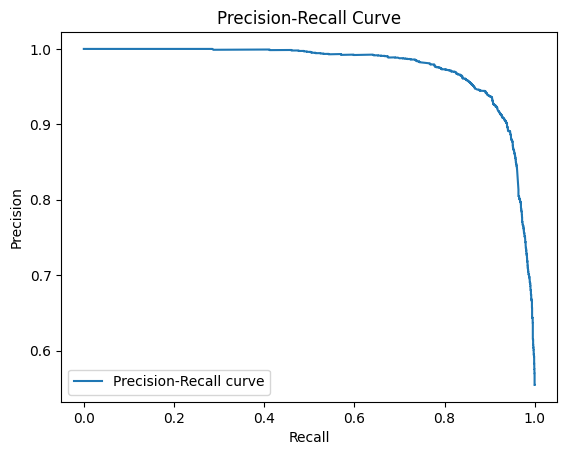

In [ ]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


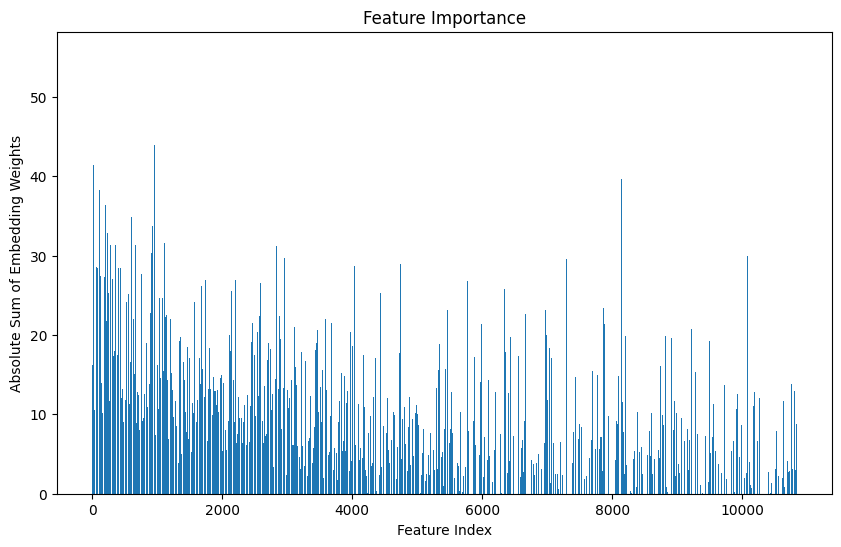

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming model1 and embedding_weights are defined
embedding_weights = model1.layers[0].get_weights()[0]

# Calculate the absolute sum of embedding weights for each feature
feature_importance = np.sum(np.abs(embedding_weights), axis=1)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Absolute Sum of Embedding Weights')
plt.title('Feature Importance')
plt.show()
